### Linear Regression in PyTorch 

1) Design model - input, output size, forward pass with layers \
2) Construct loss and optimizer \
3) Training loop
- forward pass - compute prediction
- backward pass - gradient calculations
- update weights

In [2]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

In [10]:
# Step 1 - Prepare the Data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) #built in pytorch methods that will reshape a tensor

n_samples, n_features = X.shape

In [11]:
# Step 2 - Build the Model

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [19]:
# Step 3 - setup the Loss and Optimizers

learning_rate = 0.08

criterion = nn.MSELoss() # a callable function for mapping errors 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


In [21]:
# Step 4 - Define the training loop

num_epochs = 100

for epoch in range(num_epochs):
    
    #forward pass and loss
    y_pred = model(X)
    
    loss = criterion(y_pred, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # Get rid of te accumulated gradient calculations
    
    optimizer.zero_grad()
    
    if(epoch+1)% 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 332.5675
epoch: 20, loss = 332.5675
epoch: 30, loss = 332.5675
epoch: 40, loss = 332.5675
epoch: 50, loss = 332.5675
epoch: 60, loss = 332.5675
epoch: 70, loss = 332.5675
epoch: 80, loss = 332.5675
epoch: 90, loss = 332.5675
epoch: 100, loss = 332.5675


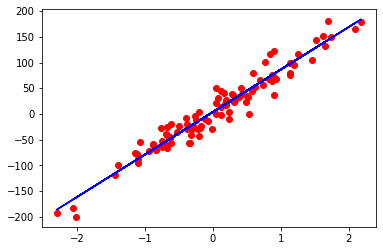

In [35]:
# plot the prediction to the actual values

predicted = model(X).detach() #this is out new tensor and we will conver this to numpy
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
